# Takeaway 1:
**Question:** What are the benefits that people who have been coding for the longest time enjoy the most? and, Does them change over the time?

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [2]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

## Getting only the columns that we are interested in

In [3]:
df = df[['YearsCodedJob', 'ImportantBenefits']]
df.shape

(51392, 2)

In [4]:
df = df.dropna()
df.describe()

,YearsCodedJob,ImportantBenefits
count,24993,24993
unique,21,3208
top,1 to 2 years,None of these
freq,3059,422


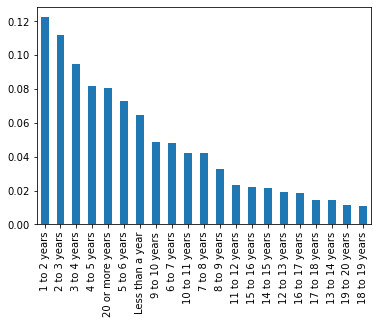

In [5]:
years_code_job_ratio = df['YearsCodedJob'].value_counts()/df.shape[0]
years_code_job_ratio.plot(kind='bar');

In [6]:
benefits_options = count_options(df['ImportantBenefits'])
benefits_options

defaultdict(<function utils.count_options.<locals>.<lambda>()>,
            {'Stock options': 3801,
             'Annual bonus': 8214,
             'Health benefits': 11919,
             'Equipment': 10094,
             'Private office': 2713,
             'Professional development sponsorship': 9619,
             'Education sponsorship': 4001,
             'Remote options': 13651,
             'Expected work hours': 11243,
             'Vacation/days off': 14730,
             'Long-term leave': 3525,
             'Child/elder care': 2172,
             'Meals': 3530,
             'Retirement': 6747,
             'Charitable match': 628,
             'None of these': 490,
             'Other': 721})

In [7]:
takeaway1 = pd.DataFrame(index=benefits_options.keys())

In [8]:
for years_code_job in df['YearsCodedJob'].value_counts().keys():  
    benefits_column = df.loc[df['YearsCodedJob'] == years_code_job, 'ImportantBenefits']
    takeaway1[years_code_job] = pd.Series(count_options(benefits_column)) / years_code_job_ratio[years_code_job] / df.shape[0]

takeaway1

,1 to 2 years,2 to 3 years,3 to 4 years,4 to 5 years,20 or more years,5 to 6 years,Less than a year,9 to 10 years,6 to 7 years,10 to 11 years,...,8 to 9 years,11 to 12 years,15 to 16 years,14 to 15 years,12 to 13 years,16 to 17 years,17 to 18 years,13 to 14 years,19 to 20 years,18 to 19 years
Stock options,0.136973,0.135242,0.135672,0.149610,0.175917,0.149671,0.129790,0.172272,0.153078,0.174693,...,0.158537,0.155709,0.196780,0.159633,0.173913,0.176344,0.176796,0.166205,0.161512,0.131086
Annual bonus,0.329519,0.343470,0.332629,0.342593,0.295837,0.337719,0.321384,0.345365,0.331947,0.333333,...,0.314634,0.337370,0.304114,0.335780,0.316770,0.331183,0.295580,0.307479,0.281787,0.307116
Health benefits,0.472377,0.486583,0.488166,0.469786,0.515362,0.466557,0.487639,0.478261,0.488353,0.466478,...,0.452439,0.484429,0.466905,0.434862,0.478261,0.466667,0.411602,0.423823,0.463918,0.501873
Equipment,0.391304,0.410733,0.416314,0.421053,0.363726,0.411732,0.379481,0.423298,0.421797,0.401322,...,0.423171,0.408304,0.382826,0.370642,0.418219,0.391398,0.403315,0.437673,0.415808,0.426966
Private office,0.095129,0.094097,0.092984,0.098441,0.174430,0.097588,0.098269,0.117309,0.106489,0.098206,...,0.092683,0.089965,0.130590,0.130275,0.111801,0.156989,0.116022,0.108033,0.147766,0.161049
Professional development sponsorship,0.402092,0.412165,0.419696,0.413743,0.272547,0.382675,0.375773,0.374897,0.401830,0.387158,...,0.435366,0.384083,0.395349,0.368807,0.347826,0.320430,0.372928,0.379501,0.319588,0.265918
Education sponsorship,0.226218,0.186047,0.177092,0.167154,0.082260,0.164474,0.229295,0.132075,0.148918,0.144476,...,0.150000,0.107266,0.128801,0.141284,0.091097,0.120430,0.088398,0.108033,0.113402,0.093633
Remote options,0.488722,0.513059,0.513102,0.537524,0.621407,0.550439,0.452410,0.560295,0.552413,0.605288,...,0.590244,0.603806,0.604651,0.579817,0.600414,0.587097,0.616022,0.667590,0.567010,0.617978
Expected work hours,0.424975,0.427907,0.442519,0.454678,0.444500,0.446820,0.448702,0.439705,0.479201,0.451369,...,0.474390,0.453287,0.457961,0.486239,0.515528,0.477419,0.505525,0.454294,0.484536,0.460674
Vacation/days off,0.559006,0.583542,0.597210,0.605750,0.573835,0.589364,0.555006,0.607055,0.611481,0.595845,...,0.620732,0.636678,0.588551,0.585321,0.610766,0.591398,0.668508,0.587258,0.570447,0.599251


## Reordering Data frame to better understanding

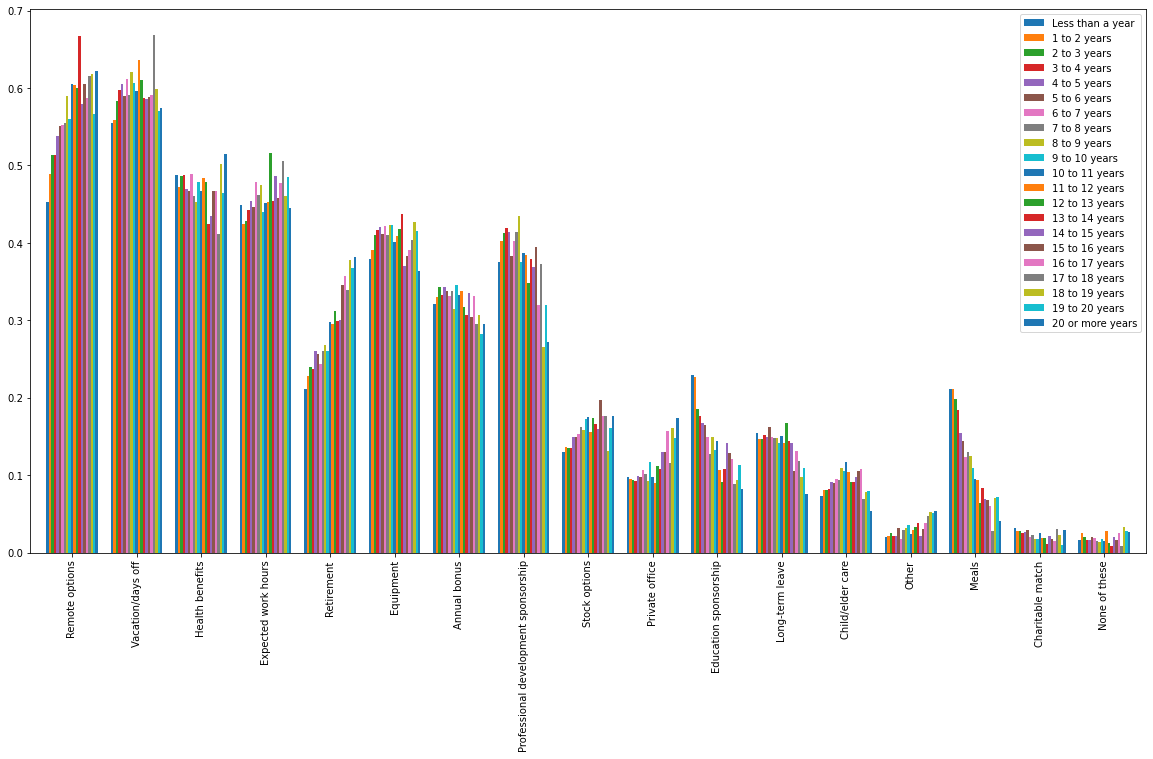

In [9]:
column_order = [
    'Less than a year',
    '1 to 2 years',
    '2 to 3 years',
    '3 to 4 years',
    '4 to 5 years',
    '5 to 6 years',
    '6 to 7 years',
    '7 to 8 years',
    '8 to 9 years',
    '9 to 10 years',
    '10 to 11 years',
    '11 to 12 years',
    '12 to 13 years',
    '13 to 14 years',
    '14 to 15 years',
    '15 to 16 years',
    '16 to 17 years',
    '17 to 18 years',
    '18 to 19 years',
    '19 to 20 years',
    '20 or more years'
]
takeaway1 = takeaway1[column_order]
index_order = [
    'Vacation/days off',
    'Remote options',
    'Health benefits',
    'Expected work hours',
    'Equipment',
    'Professional development sponsorship',
    'Annual bonus',
    'Retirement',
    'Stock options',
    'Education sponsorship',
    'Long-term leave',
    'Meals',
    'Private office',
    'Child/elder care',
    'Other',
    'Charitable match',
    'None of these'
]
takeaway1 = takeaway1.reindex(takeaway1['20 or more years'].sort_values(ascending=False).index)
takeaway1.plot(figsize=(20,10), kind='bar', width=0.8);

## Again, we organize the Data Frame to better understanding

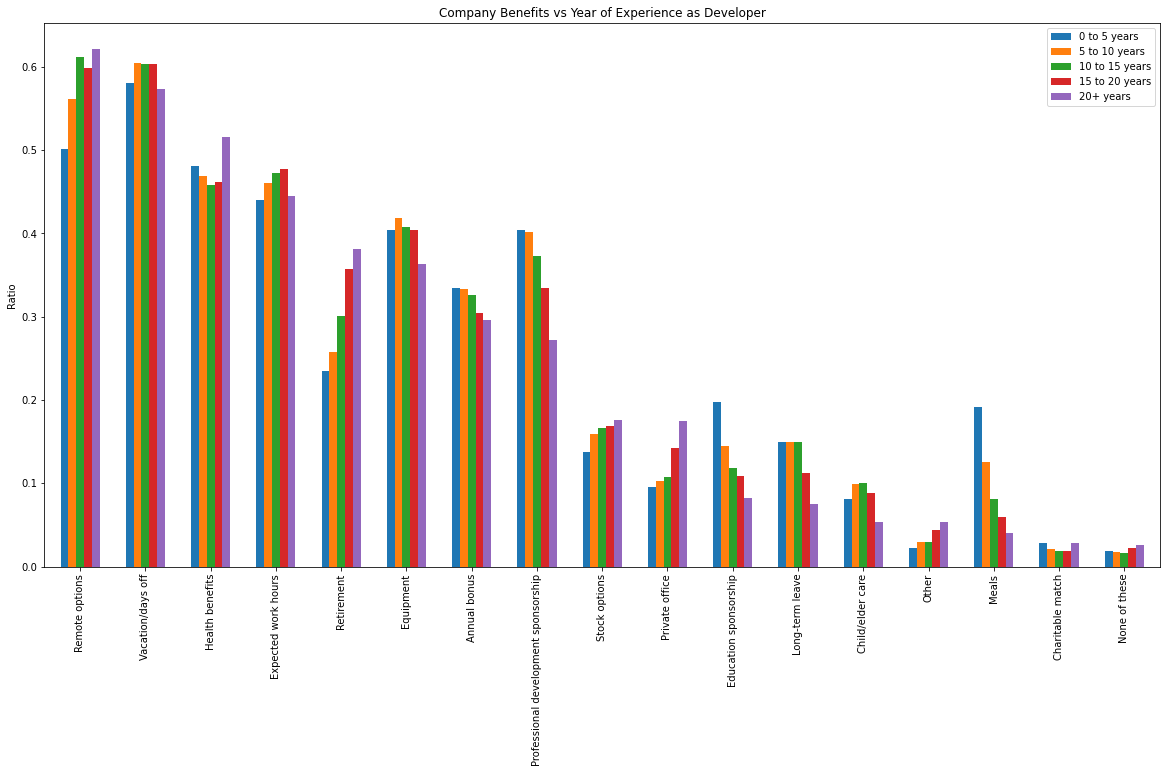

In [10]:
takeaway1a = pd.DataFrame(index=benefits_options)
takeaway1a['0 to 5 years'] = (takeaway1['Less than a year'] + takeaway1['1 to 2 years'] + takeaway1['2 to 3 years'] + takeaway1['3 to 4 years'] + takeaway1['4 to 5 years'])/5
takeaway1a['5 to 10 years'] = (takeaway1['5 to 6 years'] + takeaway1['6 to 7 years'] + takeaway1['7 to 8 years'] + takeaway1['8 to 9 years'] + takeaway1['9 to 10 years'])/5
takeaway1a['10 to 15 years'] = (takeaway1['10 to 11 years'] + takeaway1['11 to 12 years'] + takeaway1['12 to 13 years'] + takeaway1['13 to 14 years'] + takeaway1['14 to 15 years'])/5
takeaway1a['15 to 20 years'] = (takeaway1['15 to 16 years'] + takeaway1['16 to 17 years'] + takeaway1['17 to 18 years'] + takeaway1['18 to 19 years'] + takeaway1['19 to 20 years'])/5
takeaway1a['20+ years'] = takeaway1['20 or more years']
takeaway1a = takeaway1a.reindex(takeaway1['20 or more years'].sort_values(ascending=False).index)
takeaway1a.plot(figsize=(20,10), kind='bar', width=0.6, title="Company Benefits vs Year of Experience as Developer", ylabel="Ratio");